##**Convolution from scratch**

In [1]:
import numpy as np
image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 2],
    [3, 0, 1, 2, 1],
    [2, 1, 3, 0, 0],
    [1, 2, 0, 1, 2]
])

image.shape

(5, 5)

In [3]:
# Output of the input image if we convolve with 3x3 kernel
5-3+1, 5-3+1

(3, 3)

In [7]:
# Define a simple 5x5 grayscale image
image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 2],
    [3, 0, 1, 2, 1],
    [2, 1, 3, 0, 0],
    [1, 2, 0, 1, 2]
])

# Define a 3x3 kernel (filter)
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

# Define the convolution operation
def convolve(image, kernel):
  image_h, image_w = image.shape
  kernel_h, kernel_w = kernel.shape
  output_h = image_h - kernel_h + 1
  output_w = image_w - kernel_w + 1
  output = np.zeros((output_h, output_w))

  for i in range(output_h):
    for j in range(output_w):
      output[i, j] = np.sum(image[i: i+kernel_h, j: j+kernel_w] * kernel)

  return output

# Apply the convolution
output = convolve(image, kernel)
print(f"Convolution output: \n{output}")

Convolution output: 
[[  0.   0.  -6.]
 [  6.   3.  -3.]
 [  3. -10.   6.]]


##**Padding with Stride = 1**

1. Padding: Zero-padding is added to the image to control the spatial dimensions of the output.
2. Stride: Controls how much the filter moves at each step. A stride of 1 means the filter moves one pixel at a time.
3. Convolution with Padding and Stride: The output is now controlled by the padding and stride, allowing us to maintain or reduce the spatial dimensions of the output.

In [9]:
# Adding padding
def pad_image(image, pad):
  return np.pad(image, pad, mode = 'constant', constant_values = 0) # Zero Padding

pad_image(image, 1)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0, 1, 0],
       [0, 0, 1, 2, 3, 2, 0],
       [0, 3, 0, 1, 2, 1, 0],
       [0, 2, 1, 3, 0, 0, 0],
       [0, 1, 2, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [16]:
# Modifying construction to include stride and padding
def convolve_with_padding_and_stride(image, kernel, stride = 1, padding = 0):
  if padding > 0:
    image = pad_image(image, padding)

  image_h, image_w = image.shape
  kernel_h, kernel_w = kernel.shape
  output_h = (image_h - kernel_h) // stride + 1
  output_w = (image_w - kernel_h) // stride + 1
  output = np.zeros((output_h, output_w))

  for i in range(output_h):
    for j in range(output_w):
        output[i // stride, j // stride] = np.sum(image[i: i+kernel_h, j:j+kernel_w] * kernel)

  return output

# Define a simple 5x5 grayscale image
image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 2],
    [3, 0, 1, 2, 1],
    [2, 1, 3, 0, 0],
    [1, 2, 0, 1, 2]
])

# Apply the convolutional with padding & strides
padded_output = convolve_with_padding_and_stride(image, kernel, stride = 1, padding = 1)
print("Padded Convolutional Output:\n", padded_output)

Padded Convolutional Output:
 [[ -2.  -3.  -8.   7.  -2.]
 [  5.   0.   0.  -6.  -3.]
 [-10.   6.   3.  -3.   0.]
 [ -3.   3. -10.   6.   3.]
 [  0.  -6.   6.  -2.  -7.]]


##**Max Pooling**

In [18]:
# Max Pooling function
def max_pooling(image, pool_size, stride):
  image_h, image_w = image.shape
  output_h = (image_h - pool_size) // stride + 1
  output_w = (image_w - pool_size) // stride + 1
  output = np.zeros((output_h, output_w))

  for i in range(0, output_h * stride, stride):
    for j in range(0, output_w * stride, stride):
      output[i // stride, j // stride] = np.max(image[i:i + pool_size, j:j + pool_size])

  return output

image = np.array([
    [1, 2, 3, 0, 1],
    [0, 1, 2, 3, 2],
    [3, 0, 1, 2, 1],
    [2, 1, 3, 0, 0],
    [1, 2, 0, 1, 2]
])

# Apply Max pooling function
pooled_output = max_pooling(image, pool_size = 2, stride = 2)
print("Max Pooling Output:\n", pooled_output)

Max Pooling Output:
 [[2. 3.]
 [3. 3.]]


###**Convolution on RGB images**

In [24]:
# 5x5 RGB image (3 Channels)
image = np.array([
    [[1, 0, 2], [2, 1, 1], [3, 2, 0], [0, 1, 1], [1, 0, 2]],
    [[0, 1, 0], [1, 0, 1], [2, 2, 2], [3, 1, 3], [2, 0, 1]],
    [[3, 0, 2], [0, 1, 0], [1, 0, 1], [2, 2, 2], [1, 0, 0]],
    [[2, 1, 1], [1, 0, 2], [3, 3, 1], [0, 1, 0], [0, 2, 1]],
    [[1, 2, 2], [2, 1, 0], [0, 0, 1], [1, 2, 2], [2, 1, 1]]
])

image.shape

(5, 5, 3)

In [25]:
# Define a 3x3x3 filter (kernel) for each channel (RGB)
kernel = np.array([
    [[0, 1, 0], [1, -1, 1], [0, 1, 0]],
    [[1, 0, 1], [0, -1, 0], [1, 0, 1]],
    [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
])

kernel.shape

(3, 3, 3)

In [26]:
image_w, image_h, image_c = image.shape

print(image_w, image_h, image_c)
kernel_w, kernel_h, kernel_c = kernel.shape
print(kernel_w, kernel_h, kernel_c)
output_h = image_h - kernel_h + 1
output_w = image_w - kernel_w + 1
output = np.zeros((output_h, output_w, 1))
output.shape

5 5 3
3 3 3


(3, 3, 1)

In [30]:
for k in range(image_c):
  for i in range(output_h):
    for j in range(output_w):
      output[i, j] = np.sum(image[i: i+kernel_h, j: j+kernel_w, k] * kernel)

output

array([[[10.],
        [12.],
        [12.]],

       [[16.],
        [15.],
        [11.]],

       [[ 8.],
        [11.],
        [15.]]])

In [31]:
print(f"Output shape is: {output.shape}")

Output shape is: (3, 3, 1)


In [32]:
# Define a simple 5x5x3 RGB image (3 channels)
image = np.array([
    [[1, 0, 2], [2, 1, 1], [3, 2, 0], [0, 1, 1], [1, 0, 2]],
    [[0, 1, 0], [1, 0, 1], [2, 2, 2], [3, 1, 3], [2, 0, 1]],
    [[3, 0, 2], [0, 1, 0], [1, 0, 1], [2, 2, 2], [1, 0, 0]],
    [[2, 1, 1], [1, 0, 2], [3, 3, 1], [0, 1, 0], [0, 2, 1]],
    [[1, 2, 2], [2, 1, 0], [0, 0, 1], [1, 2, 2], [2, 1, 1]]
])

# Define a 3x3x3 filter (kernel) for each channel (RGB)
kernel = np.array([
    [[0, 1, 0], [1, -1, 1], [0, 1, 0]],
    [[1, 0, 1], [0, -1, 0], [1, 0, 1]],
    [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
])

# Convolution operation
def convolution_rgb(image, kernel):
  image_h, image_w, image_c = image.shape
  kernel_h, kernel_w, kernel_c = kernel.shape
  output_h = image_h - kernel_h + 1
  output_w = image_w - kernel_w + 1
  output = np.zeros((output_h, output_w, 1))

  for k in range(image_c):
    for i in range(output_h):
      for j in range(output_w):
        output[i, j] = np.sum(image[i: i+kernel_h, j: j+kernel_w, k] * kernel)
  return output

# Apply the convolution
output = convolution_rgb(image, kernel)
print("Convolution Output:\n", output)

Convolution Output:
 [[[10.]
  [12.]
  [12.]]

 [[16.]
  [15.]
  [11.]]

 [[ 8.]
  [11.]
  [15.]]]


##**Using Keras**

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Example input shape for a 32x32 RGB image
input_shape = (100, 100, 3)

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

# Print model summary to see the structure
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the image and convert it to a numpy array
image = load_img('/content/dg.jpg')

In [48]:
image = img_to_array(image).astype('float32') / 255.0

In [49]:
image.shape

(525, 525, 3)

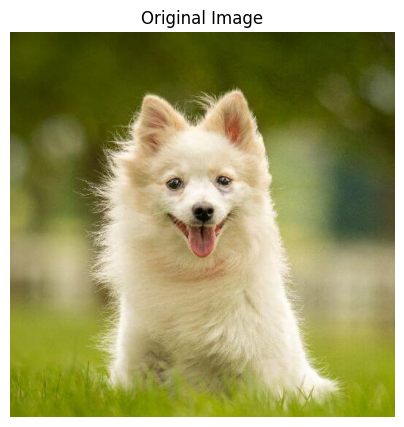

In [50]:
# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [51]:
# Define some example convolutional filters (kernels)
filters = {
    'Edge Detection': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    'Box Blur': np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
}

In [52]:
# Function to apply convolution to each channel of the RGB image
def apply_filter(image, kernel):
    # Split the image into its R, G, B channels
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]

    # Apply the kernel to each channel
    r_filtered = convolve(r, kernel)
    g_filtered = convolve(g, kernel)
    b_filtered = convolve(b, kernel)

    # Merge the channels back into an RGB image
    return np.stack([r_filtered, g_filtered, b_filtered], axis=-1)

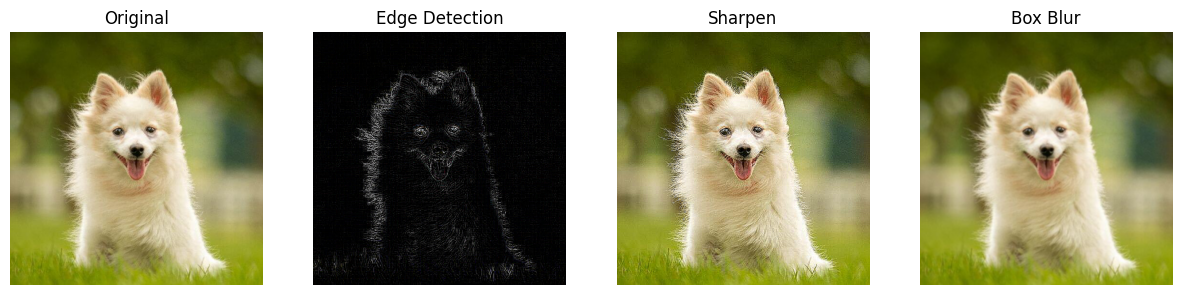

In [53]:
# Plot the results
plt.figure(figsize=(15, 5))

# Iterate over each filter, apply it, and plot the result
for i, (filter_name, kernel) in enumerate(filters.items()):
    filtered_image = apply_filter(image, kernel)

    plt.subplot(1, len(filters) + 1, i + 2)
    plt.imshow(np.clip(filtered_image, 0, 1))
    plt.title(filter_name)
    plt.axis('off')

# Display the original image for comparison
plt.subplot(1, len(filters) + 1, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.show()